# Analisis exploratorio de datos:

##### Autor: Diego Iván Gamarra Medina

En este proyecto final, realizaremos un analisis exploratorio de datos al dataset "Sales Data". Este conjunto de datos contiene información de ventas de productos en los estados unidos. Tenemos como objetivo entender el conjunto de datos, identificar patrones, relaciones y sacar insights accionables 

### Dataset: 
Nuestro set de datos contiene las siguientes variables: 
- nnamed : 0	= Indice de cada registro
- Order ID = Id único de cada orden de producto
- Product = Nombre del producto comprado
- Quantity Ordered = Cantidad del producto comprado
- Price Each = Precio unitario
- Order Date = Fecha del pedido
- Purchase Address = Direccion de la compra
- Month	= Mes de la compra
- Sales = Total de la compra
- City = ciudad de la compra
- Hour = Hora de la compra

#### Importaciones necesarias:

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re


#### Cargamos los datos


In [35]:
df = pd.read_csv("data/Sales Data.csv")

df_copy = df.copy() #Resplado del dataframe original

#### Vistazo general al dataframe

In [36]:
display(df.head())

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12


In [37]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        185950 non-null  int64  
 1   Order ID          185950 non-null  int64  
 2   Product           185950 non-null  object 
 3   Quantity Ordered  185950 non-null  int64  
 4   Price Each        185950 non-null  float64
 5   Order Date        185950 non-null  object 
 6   Purchase Address  185950 non-null  object 
 7   Month             185950 non-null  int64  
 8   Sales             185950 non-null  float64
 9   City              185950 non-null  object 
 10  Hour              185950 non-null  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 15.6+ MB


None

In [38]:
display(df.describe())

,Unnamed: 0,Order ID,Quantity Ordered,Price Each,Month,Sales,Hour
count,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000
mean,8340.388475,230417.569379,1.124383,184.399735,7.059140,185.490917,14.413305
std,5450.554093,51512.737110,0.442793,332.731330,3.502996,332.919771,5.423416
min,0.000000,141234.000000,1.000000,2.990000,1.000000,2.990000,0.000000
25%,3894.000000,185831.250000,1.000000,11.950000,4.000000,11.950000,11.000000
50%,7786.000000,230367.500000,1.000000,14.950000,7.000000,14.950000,15.000000
75%,11872.000000,275035.750000,1.000000,150.000000,10.000000,150.000000,19.000000
max,25116.000000,319670.000000,9.000000,1700.000000,12.000000,3400.000000,23.000000


- Podemois ver claramente que no poseemos datos nulos, esto nos ahorrará bastante tiempo, no será necesario imputar valores nulos.
- Se destaca una desviacion estandar bastante alta en los precios unitarios y totales, esto nos dice que dichos datos estarán bastante dispersos 
- La media y mediana de los precios unitarios y totales son muy diferentes, esto nos indica una distribucion no simétrica y posiblemente sesgada positivamente
- Tambien se observa que la columna de fecha está en formato object, debemos tratarlo y convertirlo a un tipo adecuado
- Se observa una columna llamada unnamed:0, corresponde a un id. Esa columna la eliminaremos ya que ya contamos con un índice que nos proporciona pandas y coincide de la misma manera


## Limpieza de datos

### Imputación de columnas

In [39]:
df.drop(columns=["Unnamed: 0"], inplace=True) #Eliminamos la columna Unnamed: 0 porque es un id innecesario

df.rename(columns={"Sales": 'Total'}, inplace=True) #Renombramos la columna Sales a Total, lo considero  más descripitivo

#### Corrección de tipos de datos

In [40]:
df["Order Date"] = pd.to_datetime(df["Order Date"]) #Convertimos la columna Order Date a datetime

In [41]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total,City,Hour
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12


In [42]:
df.info()   #Vemos que se realizó exitosamente la conversión

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  int64         
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int64         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
 6   Month             185950 non-null  int64         
 7   Total             185950 non-null  float64       
 8   City              185950 non-null  object        
 9   Hour              185950 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 14.2+ MB


### Creación de nuevas variables para más posibilidad de analisis

In [43]:

#Acá creamos una nueva columna state, con los estados correspondientes a la direccion de compra

# La expresión regular busca caracteres que no sean dígtos despues de la ultima coma. 
# La primera expresion es una negacion, busca uno o más caracteres que no sean comas
# La segunda expresion es una busqueda anticipada, verifica que coincida con la expresión pero no lo captura
# En esa expresion debe haber uno o más espacios en blanco, puede que no haya números, si hay puede haber uno o más
# Y si hay digitos, asegura que esten al final de la cadena despues de los espacios

df['State'] = df["Purchase Address"].apply(lambda x: re.search(r"[^,]+(?=\s+\d*$)", x).group(0) if re.search(r"[^,]+(?=\s+\d*$)", x) else None)

# en el apply se itera la columna con un lambda que retorna la expresion regular si hay coincidencias, si no, returna none


In [44]:
def asignar_estacion(fecha):
    """
    Esta funcion recibe como parámetro una fecha del df, asigna la fecha y el día a dos variables y luego,
    mediante validaciones, verifica en qué rango de fechas está para determinar la estacion del año de estados unidos
    """
    mes = fecha.month
    dia = fecha.day
    
    if(mes == 3 and dia >= 20) or (mes in [4, 5]) or (mes == 6 and dia < 21): #Primavera: Del 20 de marzo al 21 de junio
        return "Spring"
    elif(mes == 6 and dia >= 21) or (mes in [7, 8]) or (mes == 9 and dia < 22): #Verano: Del 21 de junio al 22 de septiembre
        return "Summer"
    elif(mes == 9 and dia >= 22) or (mes in [10, 11]) or (mes == 12 and dia < 21): # Otoño: Del 22 de septiembre al 21 de dicembre
        return "Fall"
    else:                                                                             #Invierno: Del 21 de diciembre al 20 de marzo
        return "Winter"
        
df["Season"] = df["Order Date"].apply(lambda x: asignar_estacion(x)) #acá se aplica la funcion creada, mediante el método apply y una funcion lambda para iterar por cada elemento de la columna fecha

In [45]:
df["Day"] = df["Order Date"].dt.dayofweek

#### Vemos las nuevas columnas creadas:

In [46]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total,City,Hour,State,Season,Day
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0,NY,Winter,0
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7,NY,Winter,6
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18,NY,Fall,3
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15,CA,Winter,6
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12,GA,Fall,2


### Analisis univariado (Categoricos)

- Usaremos gráficos como histogramas para todas las variables de nuestro dataset
- Variables a utilizar: Product, Month, City, State, Season

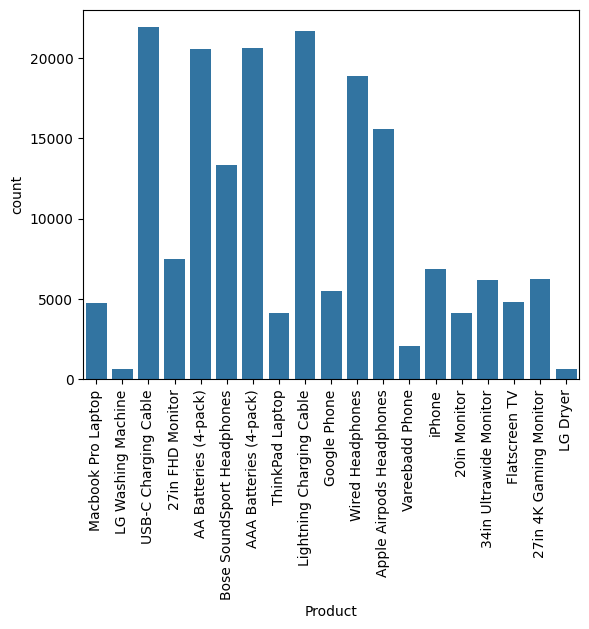

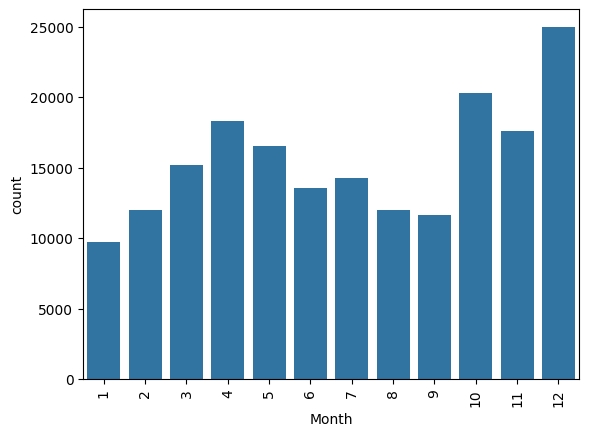

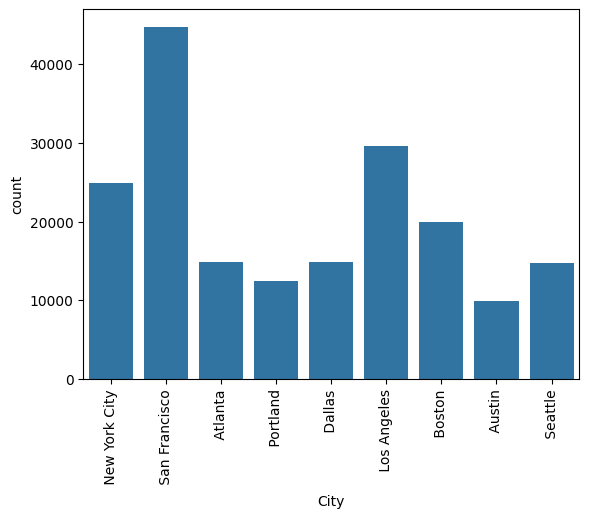

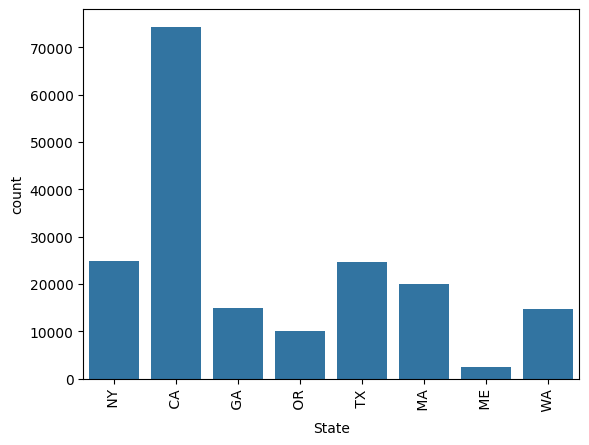

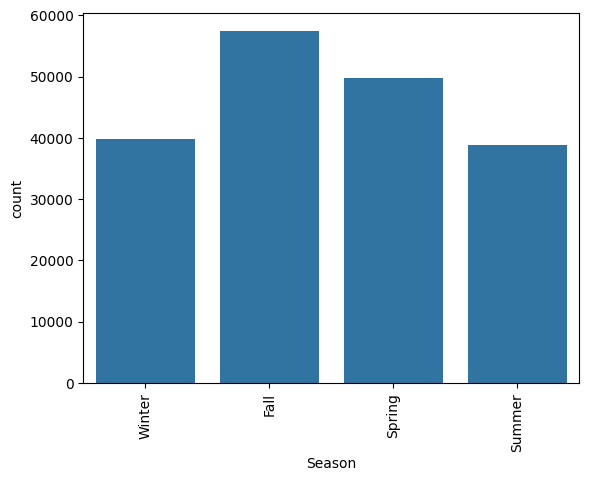

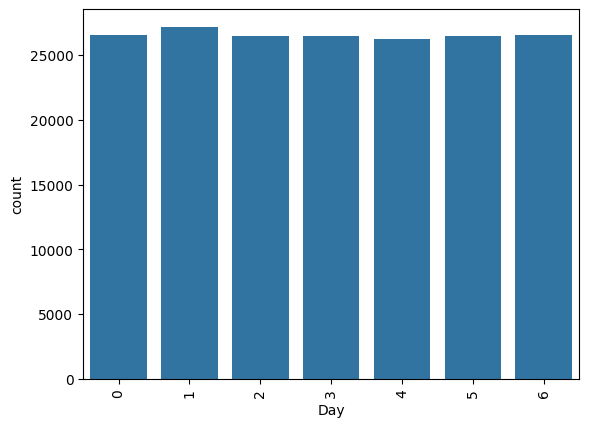

In [47]:
lista_categoricos = ["Product", "Month", "City", "State", "Season", "Day"] 

for column in lista_categoricos:
        
    sns.countplot(
    data= df,
    x = column
    )
    plt.xticks(rotation=90)
    plt.show()

#### Product:
    - Vemos una gran variedad de productos. Los que tienen picos más altos de ventas es debido a que son productos de alta rotación y se necesitan en cualquier momento. Los clientes no pensarán ni sentiran que hastan gastando ya que son productos normalmente baratos.
    - Los productos más vendidos son usb c charging cable y lightning charging cable  
#### Month
    - Menor cantidad de ventas a inicio de año, debido a probablemente gastos excesivos por las fiestas. Las ventas empiezan a subir en el 2 trimestre del año, aquí se estabiliza el mercado en general luego de fechas con alta demanda de productos. Por útimo, el pico más alto de ventas a final de año, esto debido a los aguinaldos y fiestas 
#### City
    - Las 3 ciudades principales cuentan con la mayor cantidad de ventas, New York, San francisco y Los Ángeles. Esto debido principalmente a su poblacion, cantidad de turismo y mayor presencia en el mercado, Siendo de las principales ciudades turisticas del país
#### State
    - Vemos que hay un pico enorme de ventas en california, corresponde a la mayor cantidad de ventas, era de esperarse debido a que california es el estado más poblado de los estados unidos. En el gráfico le sigue new york y texas, cuyos estados también son de los más poblados de estados unidos
#### Season
    - La temporada con más ventas sería otoño, esto debido a la entrada y preparación de los meses festivos. Esto reespalda lo dicho anteriormente con respecto a los meses, ya que en invierno, pasando las fechas festivas, hay un decremento importante en las ventas
#### Day
    - Se ve un gráfico bastante plano, prácticamente en todos los días de la semana hay casi la misma cantidad de ventas

### Analisis univariado (Numéricos):
- Usaremos Gráficos de densidad y gráficos de caja
- Variables a utilizar: Price Each, Total, Quantity Ordered, Hour

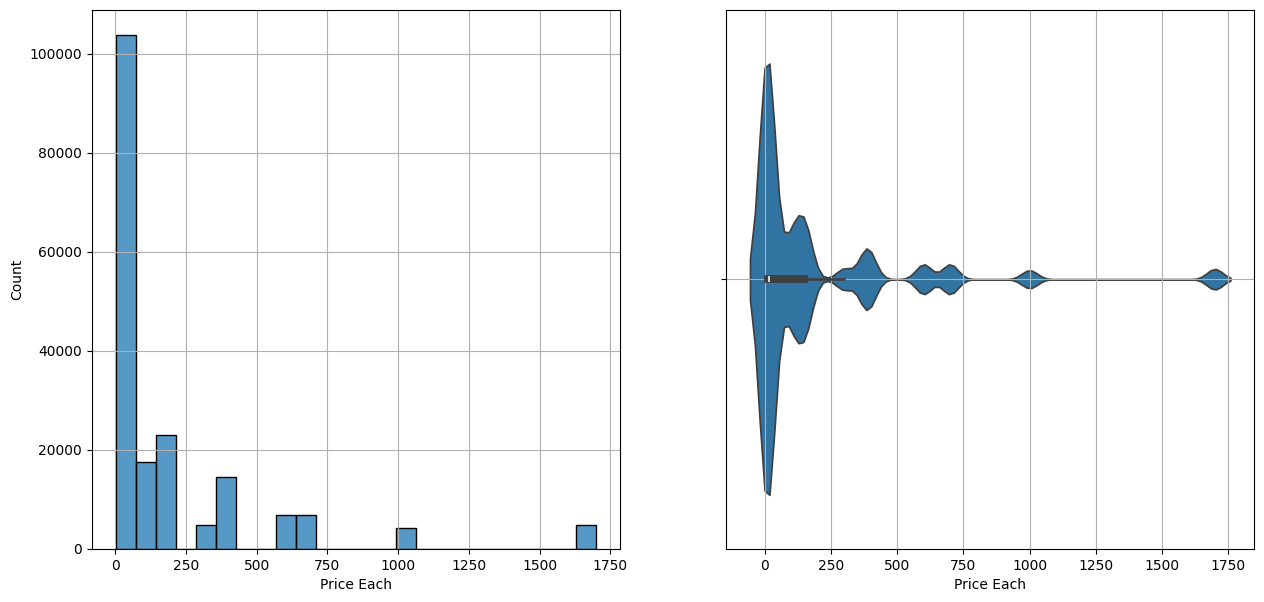

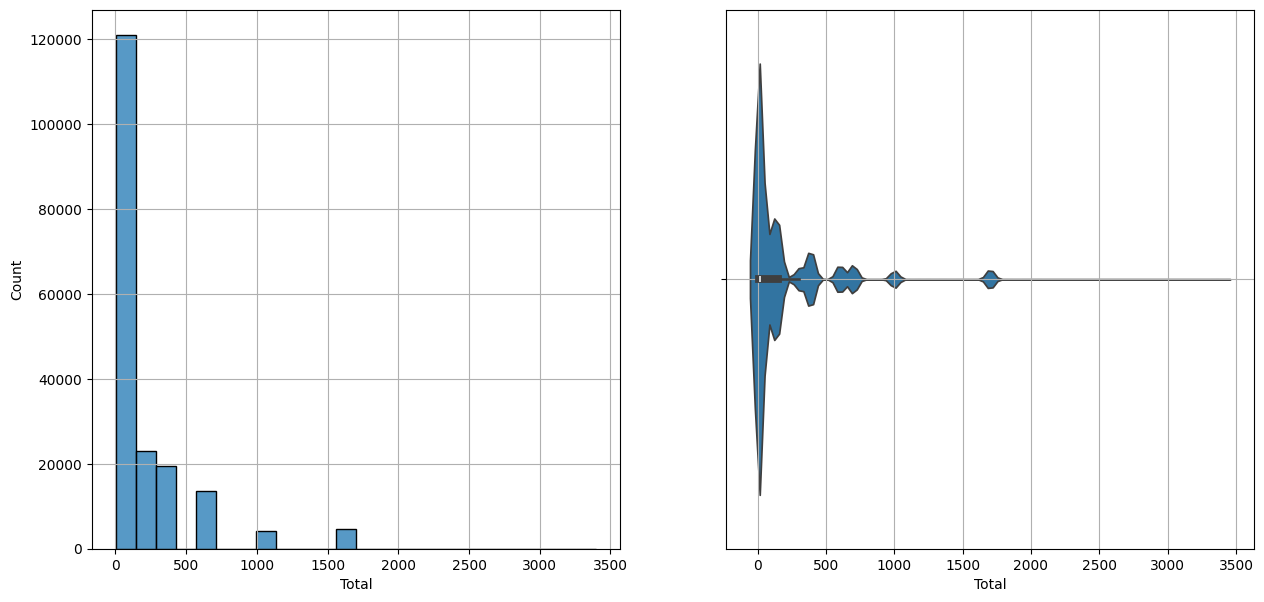

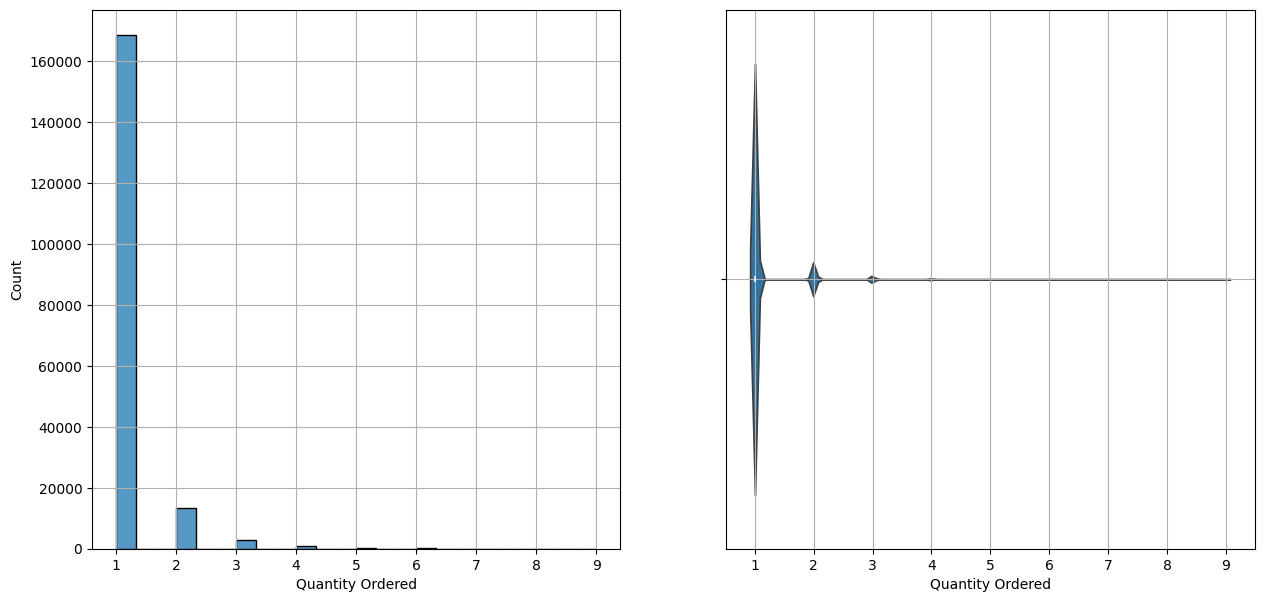

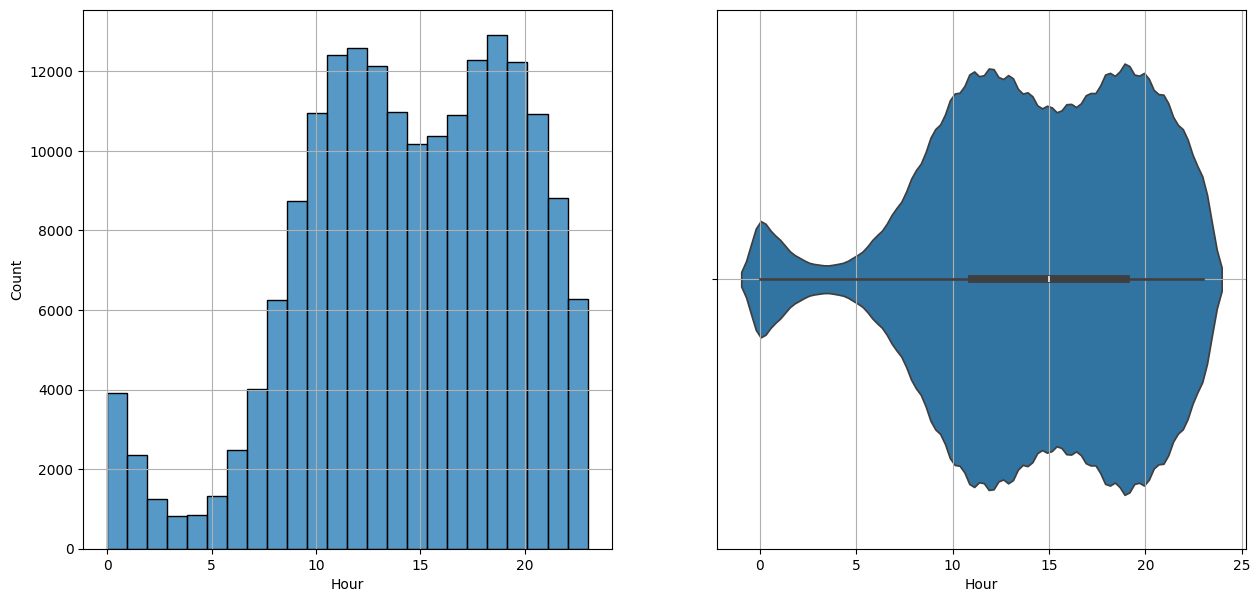

In [48]:
lista_numericos = ["Price Each", "Total", "Quantity Ordered", "Hour"]

for column in lista_numericos:
    plt.figure(figsize=(15, 7))
    plt.subplot(1,2,1)
    sns.histplot(
        data= df,
        x = column,
        kde= False,
        bins = 24
        
    )
    plt.grid()
    
    plt.subplot(1,2,2)  #uso de violinplot para ver la distribución sin resaltar outliers 
    sns.violinplot(
        data= df,
        x = column,
        
    )
    plt.grid()
    plt.show()

#### Price Each:
    - El 50% de los precios están en un rango de 1 a 180 dolares
    - En esa columna, observamos un sesgo gigantesco, debido a los distintos precios, mayor cantidad de productos baratos, pero los productos caros crean este sesgo. Esto es porque hay productos desde pilas que rondarian de 2 a 3 dolares por ejemplo, hasta computadoras que pueden rondar de 1.000 a 3.000 dolares. Tenemos un rango de 1700 dolares aproximadamente
    - Se observa un pico gigantesco en los productos baratos, la alta rotacion y precios de dichos productos ocasionan eso.
    - Se observan unos pocos outliers en los precios unitarios, debido a los productos más caros como computadoras o telefonos de alta gama, no los considero incorrectos porque son los precios que le corresponden a cada producto, si cambiaramos los precios estariamos metiendo datos incorrectos al dataset, solo habrá que tener en cuenta el sesgo para el analisis. Reitero, no son errores ni datos extremos, solamente son menos frecuentes
#### Total:
    - De manera muy similar a los precios unitarios, el 50% de los precios están en un rango aproximado de 1 a 180 dolares, esto debido a que los productos de más rotación y menor precio son los más adquiridos. Y como veremos en la siguiente variable, influye mucho la cantidad de productos comprados por orden de compra
    - En esta columna, observamos una distribución bastante similar a la anterior, un sesgo muy importante debido al rango de precios, aumenta un poco más el rango de dinero ya que se le suma otro factor, la cantidad de productos que se puede ordenar. Se sigue observando un gran pico en los totales más baratos y una larga cola a la derecha, sesgo positivo, por los totales más caros
    - Tambien se observan outliers, en esta columna han aumentado, de igual manera siguen siendo pocos y no los considero incorrectos ya que corresponden a los productos más costosos. Reitero, no son errores ni datos extremos, solamente son menos frecuentes
#### Quantity Ordered
    - En esta columna el sesgo es abismal, diría que el 90% de las compras son de una unidad, un 5% de 2 unidades y el resto se distribuye en el resto de cantidades. Las demás cantidades aparecen como outliers pero en realidad no lo son. No son errores ni datos extremos, solamente son menos frecuentes. Esto tambien nos da a entender que se trata de un negocio minorista, no hay compras con altas cantidades de productos
#### Hour
    - En ambos gráficos se observan dos picos o grupos que destacan. Se ven gran cantidad de compras de 10 a 15 y de 15 a 20hs, lo que podría coincidir con horarios de almuerzo y horarios de salida del trabajo. Hay un pequeño pico al rededor de las 00hs, indica compras nocturnas. Debido al horarío de compras, podría tratarse de un e-commerce o de una tienda 24hs. Lo más lógico sería un e-commerce, casi no existen tiendas de articulos electronicos o informáticos que sean 24hs. En este caso, podría considerarse reforzar los servidores o personal en estos horarios picos. Podrían realizarse promociones en horas de baja demanda para incentivar la compra  

### Analisis Multivariado
- Analizaremos las combinaciones de variables más importantes en busca de tendencias

In [49]:
df["Order Date"].dt.year.value_counts()

Order Date
2019    185916
2020        34
Name: count, dtype: int64

- Antes que nada observamos que el 99% de las ventas son del 2019

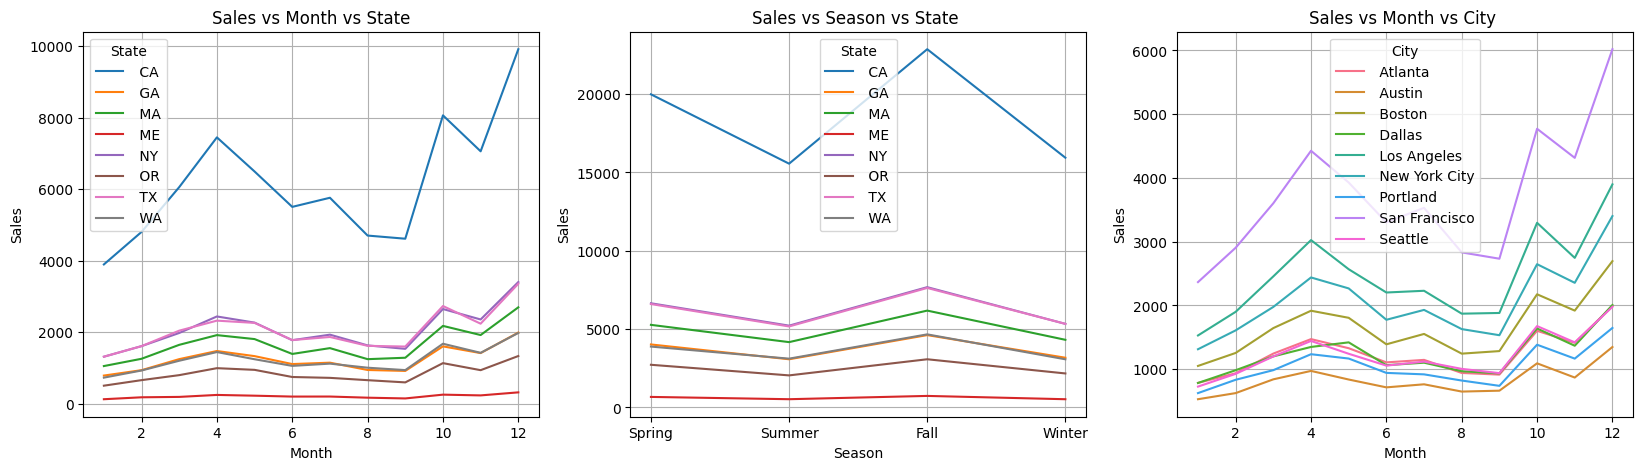

In [79]:
ventas_por_mes_por_estado = df.groupby(["Month", "State"]).size().reset_index(name="Sales")
ventas_por_estacion_por_temporada = df.groupby(["Season", "State"]).size().reset_index(name="Sales")
ventas_por_mes_por_ciudad = df.groupby(["Month", "City"]).size().reset_index(name="Sales")

# Definir el orden deseado
orden_personalizado = ["Spring", "Summer", "Fall", "Winter"]

# Convertir la columna a categoría ordenada
ventas_por_estacion_por_temporada["Season"] = pd.Categorical(ventas_por_estacion_por_temporada["Season"], categories=orden_personalizado, ordered=True) # acá ordenamos las estaciones para tener un mejor gráfico

plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.lineplot(
    data=ventas_por_mes_por_estado,
    x = "Month",
    y = "Sales",
    hue= "State",
    # palette="husl"
)
plt.title("Sales vs Month vs State")
plt.grid()

plt.subplot(1,3,2)
sns.lineplot(
    data=ventas_por_estacion_por_temporada,
    x = "Season",
    y = "Sales",
    hue= "State",
    # palette="husl"
)
plt.title("Sales vs Season vs State ")
plt.grid()

plt.subplot(1,3,3)
sns.lineplot(
    data=ventas_por_mes_por_ciudad,
    x = "Month",
    y = "Sales",
    hue= "City",
    palette="husl"
)
plt.title("Sales vs Month vs City ")
plt.grid()
plt.show()

- En el gráfico izquierdo obsevamos la cantidad de ventas por los meses del año y por estados, vemos claramente que las ventas suben drásticamente a finales de año, por las fechas festivas. Se observa otro pico en unos meses previos como octubre, se debe a la anticipacion de las fiestas. El pico que se encuentra en abril podría deberse a las vacaciones de primavera de los estudiantes, en fechas de pascua y semana santa, y esto resulta en más ventas. Luego se observa una gran caída en las ventas hasta septiembre debido a los gastos previos y futuros para las fiestas. Esta caida es bastante interesante, ya que coincide con las vacaciones de verano, intuyo que debido a los futuros gastos que se aproximan, como los gastos para la vuelta a clases y los gastos de las fiestas, las ventas bajan drásticamente en este lapso de tiempo.

- En el gráfico del medio observamos la cantidad de ventas por estaciones del año y por estados. Vemos que otoño es el mes con mayor cantidad de ventas, estación previa y entrante a invierno, fechas festivas. Vemos el gran descenso al entrar invierno y pasar las fiestas. Luego comienza a subir en primavera, las vacaciones de pascua y semana santa. En verano observamos la caida drástica de las ventas. Este gráfico es basicamente un reflejo de manera más resumida que el gráfico anterior. Se podría aumentar el stock en las fechas con más compras de todo el año, para las fechas con caida de ventas, planificar estrategias de publicidad, promociones, etc. En un intento de aumentar las ventas.

- Obs: en ambos gráficos se observa que el estado de Maine (Me) se mantiene con ventas muy bajas, pero de igual manera se nota que sigue la tendencia estacionaria, de una manera mucho más sutil, poco perceptible. 

- En el gráfico de la derecha observamos la cantidad de ventas por meses y por ciudades. En todas las ciudades se sigue observando el mismo patrón estacional. Curiosamente, San Francisco es la ciudad con mayor cantidad de ventas, siendo esta poco poblada en comparación a Los angeles y Nueva York, que son las ciudades que le siguen en el gráfico.

- En general, se observa el mismo patron de estacionalidad en todos los gráficos, en algunos más pronunciados que otros, pero todos siguen el mismo patrón.

In [ ]:
## HACER GRÁFICOS COMPARANDO TOTALES --- HACER DIAGRAMA DE PARETO "80%-20% PARA COMPARAR CIUDADES O ESTADOS CON VENTAS O TOTAL"
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total,City,Hour,State,Season,Day
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0,NY,Winter,0
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7,NY,Winter,6
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18,NY,Fall,3
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15,CA,Winter,6
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12,GA,Fall,2


In [65]:
# ventas_por_mes = df.groupby(["Month"]).size().reset_index(name="Sales")
# sns.lineplot(
#     data= ventas_por_mes,
#     x = "Month",
#     y = "Sales",
#     marker = "o"
# )
# plt.xticks(rotation = 45)
# plt.show()

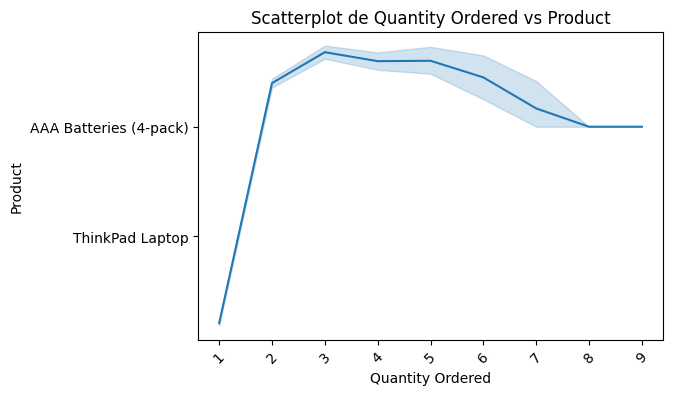

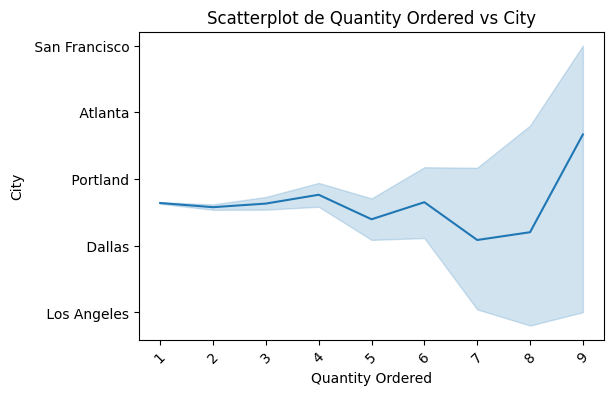

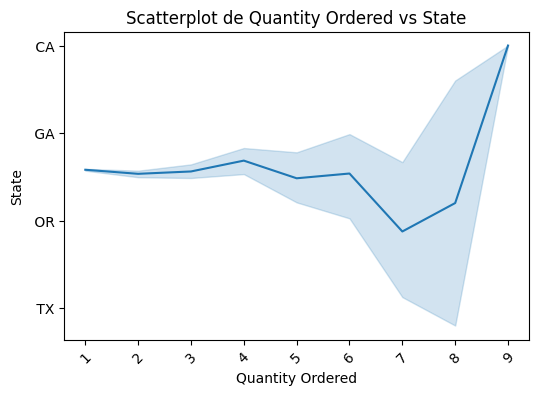

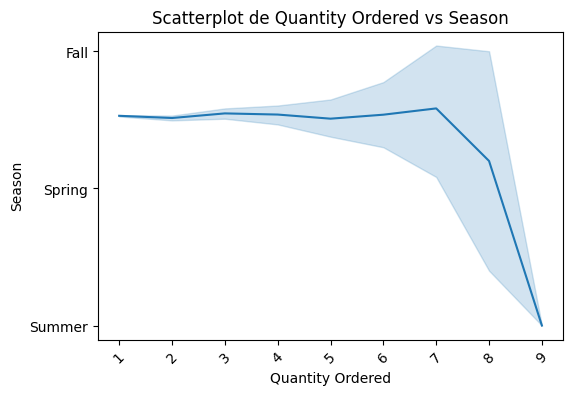

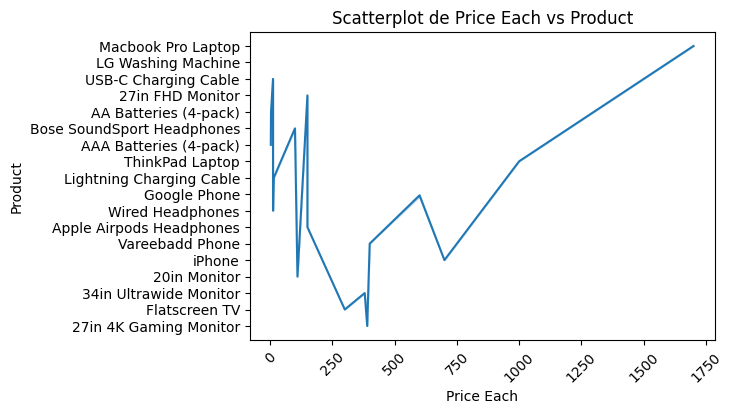

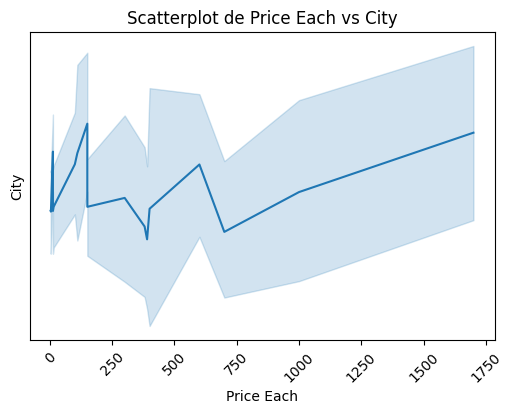

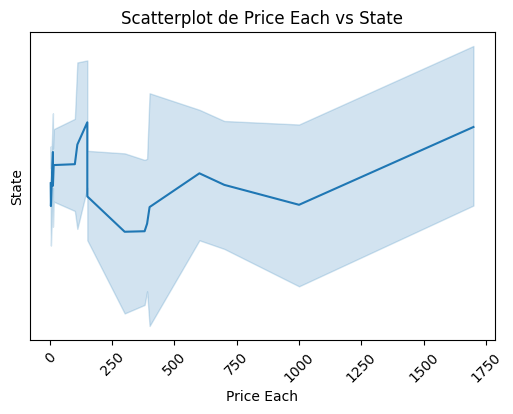

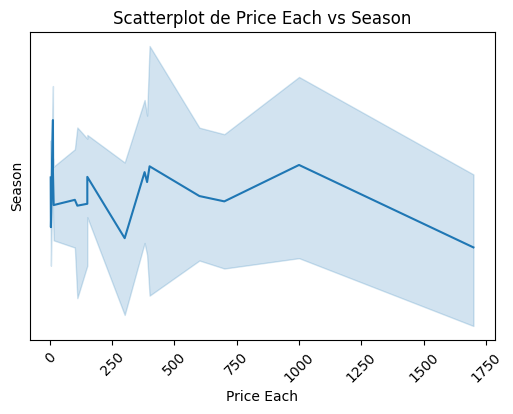

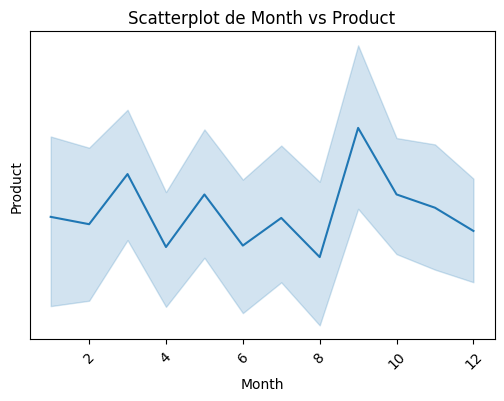

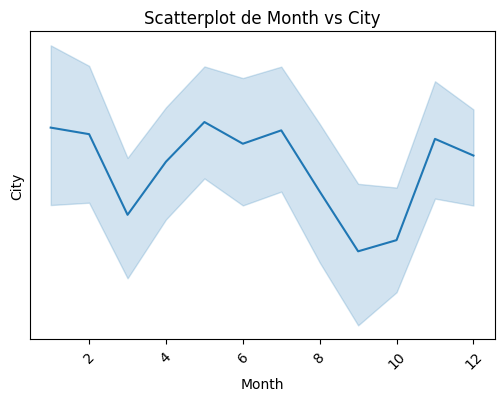

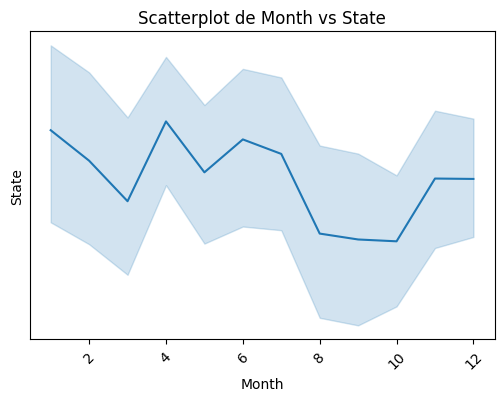

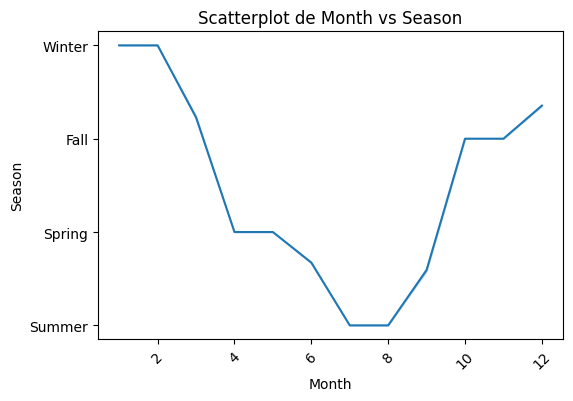

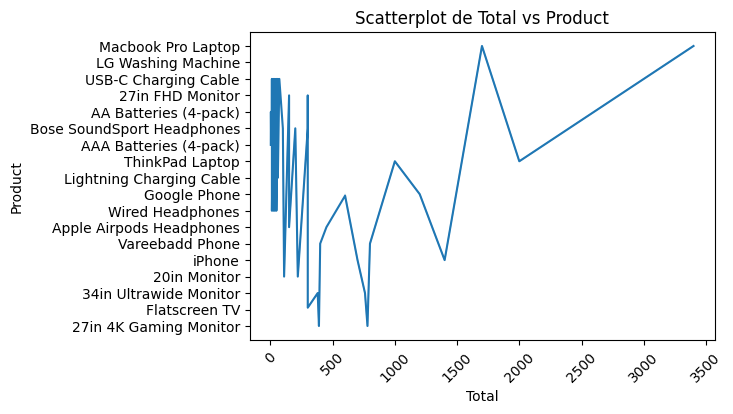

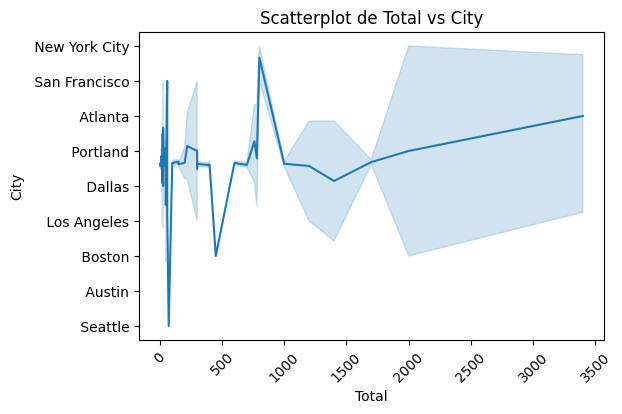

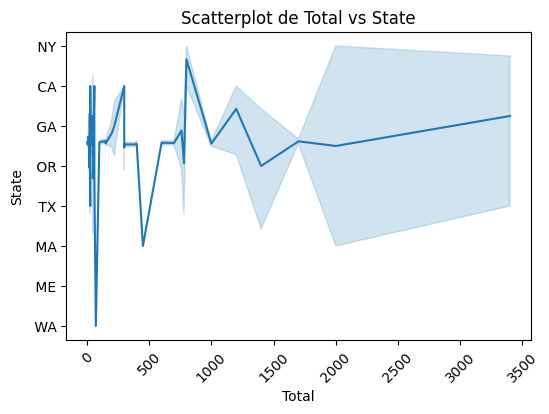

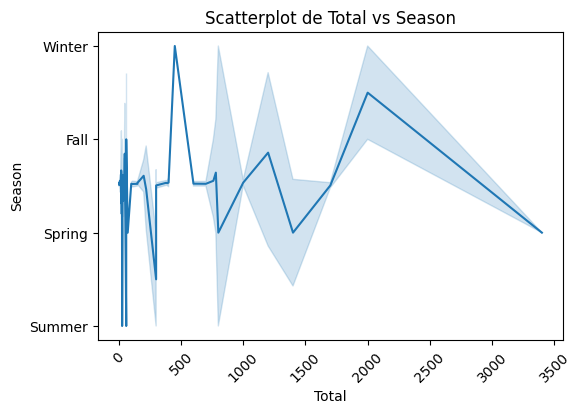

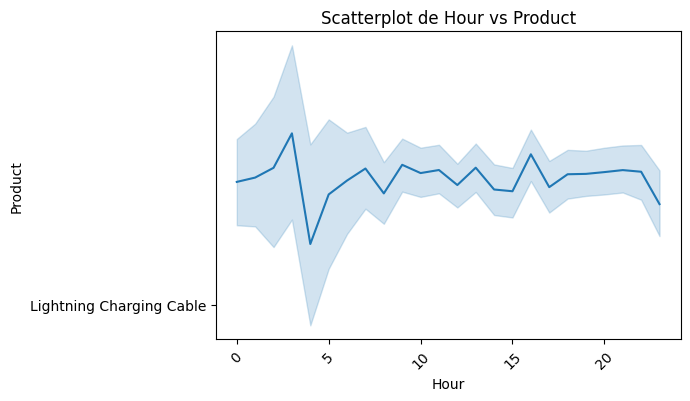

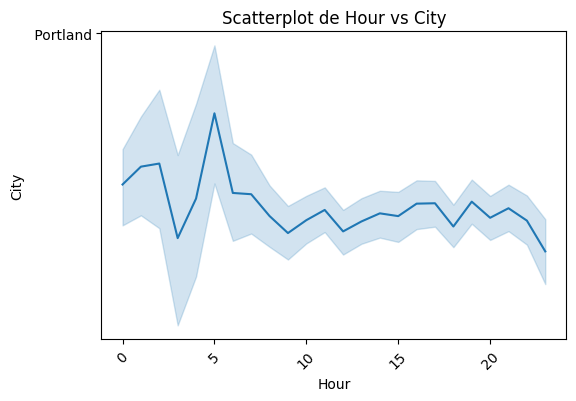

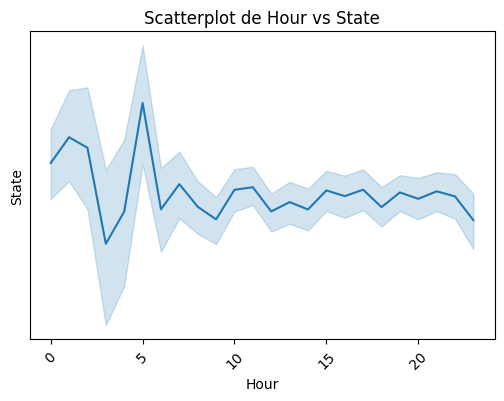

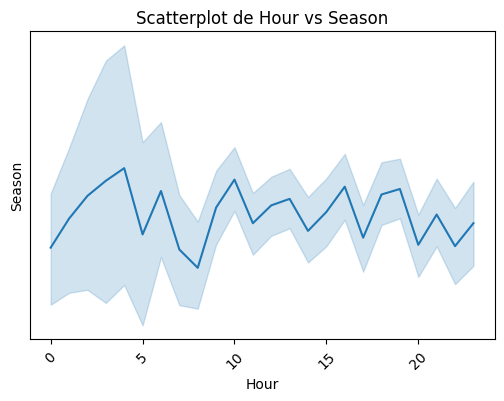

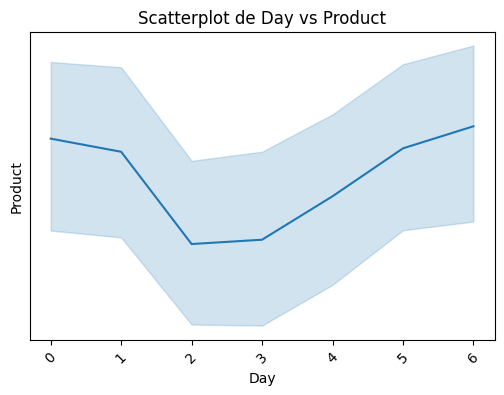

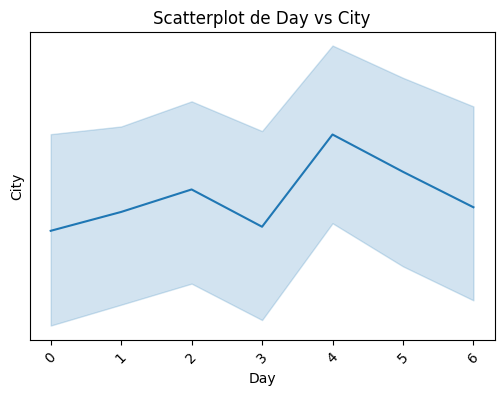

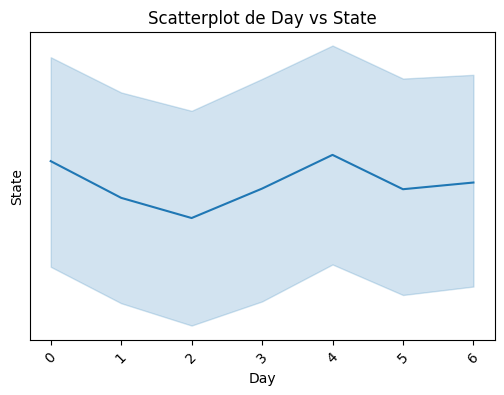

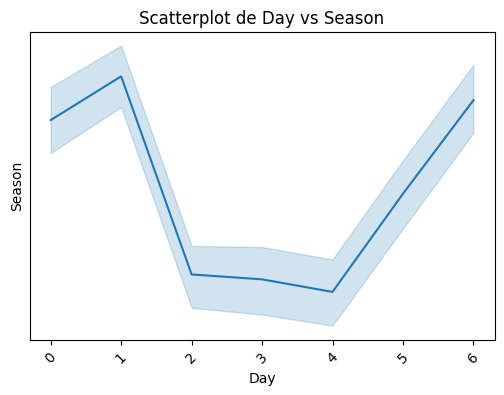

In [ ]:
# for column_num in df.select_dtypes(include="number"):
#     for column_cat in df.select_dtypes(include="object"):
        
#         if(column_num == "Order ID" or column_num == "Order Date" or column_cat == "Order Date" or column_cat == "Purchase Address"):
#             continue
#         plt.figure(figsize=(6, 4))  # Crea una nueva figura antes del gráfico

#         sns.lineplot(
#             data=df,
#             x=column_num,
#             y=column_cat,
            
#         )
        
#         plt.title(f'Scatterplot de {column_num} vs {column_cat}')
#         plt.xticks(rotation=45)  # Opcional: girar etiquetas si hay muchas
#         plt.show()
        